### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ingresos estimados por tienda (Suma de Precios):
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


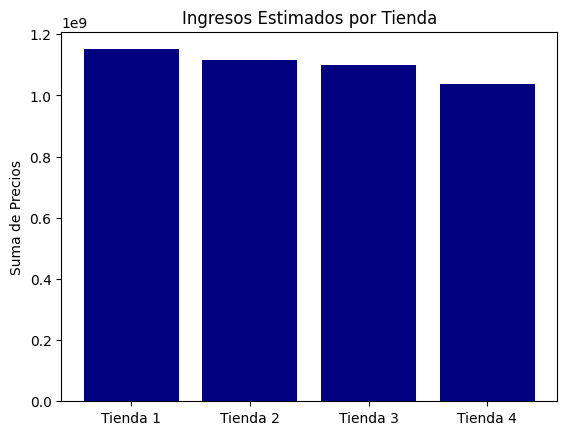

In [192]:
# ingreso total por tienda (Precio)
ingreso_t1 = tienda['Precio'].sum()
ingreso_t2 = tienda2['Precio'].sum()
ingreso_t3 = tienda3['Precio'].sum()
ingreso_t4 = tienda4['Precio'].sum()

resumen_ingresos = {
    'Tienda 1': ingreso_t1,
    'Tienda 2': ingreso_t2,
    'Tienda 3': ingreso_t3,
    'Tienda 4': ingreso_t4
}

print("Ingresos estimados por tienda (Suma de Precios):")
for tienda_nombre, total in resumen_ingresos.items():
    print(f"{tienda_nombre}: ${total:,.2f}")

# Visualización rápida
import matplotlib.pyplot as plt

plt.bar(resumen_ingresos.keys(), resumen_ingresos.values(), color='navy')
plt.title('Ingresos Estimados por Tienda')
plt.ylabel('Suma de Precios')
plt.show()

# 2. Ventas por categoría

In [25]:
# Buscar la categoria mas pupular
lista_tiendas = [tienda, tienda2, tienda3, tienda4]

for i, t in enumerate(lista_tiendas, start=1):
    print(f"\n--- Categorías más populares Tienda {i} ---")

    # Agrupamos, contamos y muestra los mas vendidos
    top_categorias = t.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
    print(top_categorias.head(3))


--- Categorías más populares Tienda 1 ---
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: Producto, dtype: int64

--- Categorías más populares Tienda 2 ---
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: Producto, dtype: int64

--- Categorías más populares Tienda 3 ---
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: Producto, dtype: int64

--- Categorías más populares Tienda 4 ---
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: Producto, dtype: int64


# 3. Calificación promedio de la tienda


In [27]:
lista_tiendas = [tienda, tienda2, tienda3, tienda4]

print("--- Satisfacción del Cliente: Calificación Media ---")

for i, t in enumerate(lista_tiendas, start=1):

    valoracion_media = t['Calificación'].mean()

    print(f"Tienda {i}: {valoracion_media:.2f} / 5.0")

--- Satisfacción del Cliente: Calificación Media ---
Tienda 1: 3.98 / 5.0
Tienda 2: 4.04 / 5.0
Tienda 3: 4.05 / 5.0
Tienda 4: 4.00 / 5.0


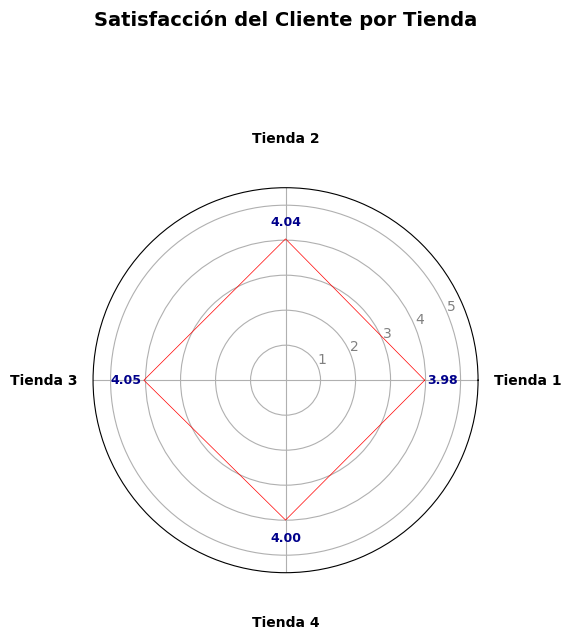

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Preparar los datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [t['Calificación'].mean() for t in [tienda, tienda2, tienda3, tienda4]]

valores = calificaciones + [calificaciones[0]]
angulos = np.linspace(0, 2 * np.pi, len(tiendas), endpoint=False).tolist()
angulos += angulos[:1]

#Configuración del gráfico
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Dibujar área y línea
ax.plot(angulos, valores, color='red', linewidth=0.5)

# Etiquetas de valores (los números 4.xx)
for i in range(len(tiendas)):
    ax.text(angulos[i], calificaciones[i] + 0.50, f'{calificaciones[i]:.2f}',
            ha='center', va='center', fontsize=9, fontweight='bold', color='darkblue')

# Ajuste de etiqueta de nombres de tiendas
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(tiendas, fontsize=10, fontweight='bold')

# pad=25 separa los nombres de las tiendas del círculo de la araña
ax.tick_params(axis='x', which='major', pad=25)

# Configurar el rango y escala
ax.set_ylim(0, 5.5)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['1', '2', '3', '4', '5'], color="grey", size=10)

plt.title('Satisfacción del Cliente por Tienda', size=14, fontweight='bold', y=1.4)
plt.show()

# 4. Productos más y menos vendidos

In [32]:
lista_tiendas = [tienda, tienda2, tienda3, tienda4]

for i, t in enumerate(lista_tiendas, start=1):
    print(f"\n--- Tienda {i} ---")

    conteo_productos = t['Producto'].value_counts()

    # el más y el menos vendido
    mas_vendido = conteo_productos.idxmax()
    cantidad_mas = conteo_productos.max()

    menos_vendido = conteo_productos.idxmin()
    cantidad_menos = conteo_productos.min()

    print(f" Producto Estrella: {mas_vendido} ({cantidad_mas} unidades)")
    print(f" Menos Vendido: {menos_vendido} ({cantidad_menos} unidades)")


--- Tienda 1 ---
 Producto Estrella: Microondas (60 unidades)
 Menos Vendido: Auriculares con micrófono (33 unidades)

--- Tienda 2 ---
 Producto Estrella: Iniciando en programación (65 unidades)
 Menos Vendido: Juego de mesa (32 unidades)

--- Tienda 3 ---
 Producto Estrella: Kit de bancas (57 unidades)
 Menos Vendido: Bloques de construcción (35 unidades)

--- Tienda 4 ---
 Producto Estrella: Cama box (62 unidades)
 Menos Vendido: Guitarra eléctrica (33 unidades)


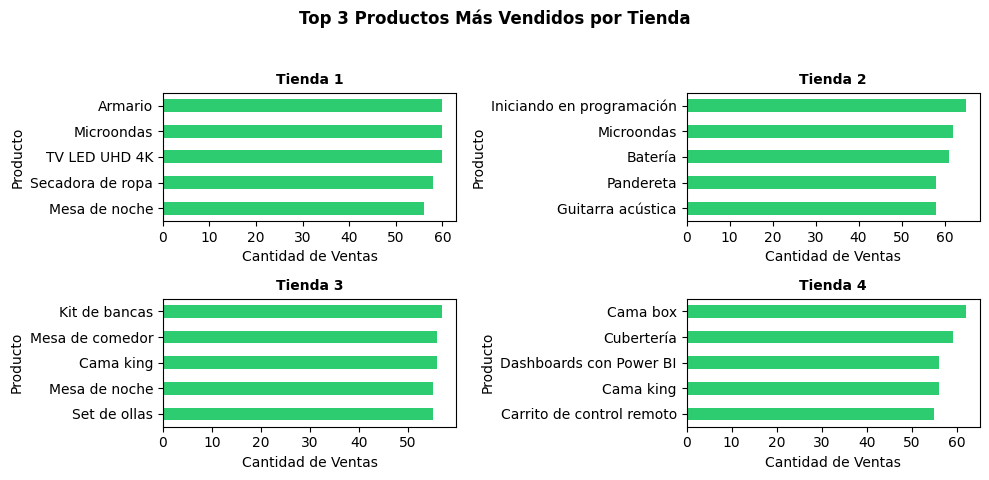

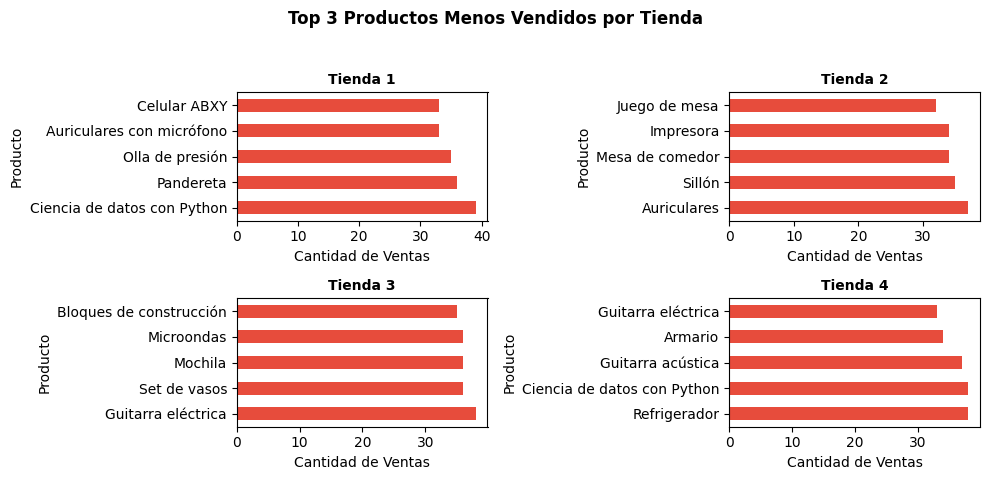

In [193]:
import matplotlib.pyplot as plt

lista_tiendas = [tienda, tienda2, tienda3, tienda4]
colores_top = '#2ecc71'  # Verde para los más vendidos
colores_bottom = '#e74c3c' # Rojo para los menos vendidos

# --- TOP 5 MÁS VENDIDOS ---
fig1, axs1 = plt.subplots(2, 2, figsize=(10, 5))
fig1.suptitle('Top 3 Productos Más Vendidos por Tienda', fontsize=12, fontweight='bold')

for i, t in enumerate(lista_tiendas):
    ax = axs1[i//2, i%2]
    top_5 = t['Producto'].value_counts().head(5)
    top_5.sort_values().plot(kind='barh', ax=ax, color=colores_top)
    ax.set_title(f'Tienda {i+1}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Cantidad de Ventas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- TOP 5 MENOS VENDIDOS ---
fig2, axs2 = plt.subplots(2, 2, figsize=(10, 5))
fig2.suptitle('Top 3 Productos Menos Vendidos por Tienda', fontsize=12, fontweight='bold')

for i, t in enumerate(lista_tiendas):
    ax = axs2[i//2, i%2]
    # Usamos tail(5) para obtener los que tienen menos registros
    bottom_5 = t['Producto'].value_counts().tail(5)
    bottom_5.sort_values(ascending=False).plot(kind='barh', ax=ax, color=colores_bottom)
    ax.set_title(f'Tienda {i+1}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Cantidad de Ventas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Envío promedio por tienda

--- Análisis de Costos de Envío ---
Costo promedio Tienda 1: $26,018.61
Costo promedio Tienda 2: $25,216.24
Costo promedio Tienda 3: $24,805.68
Costo promedio Tienda 4: $23,459.46


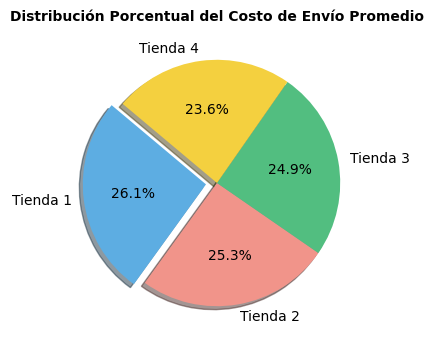

In [117]:
import matplotlib.pyplot as plt

lista_tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_envio = []

print("--- Análisis de Costos de Envío ---")

# promedios
for i, t in enumerate(lista_tiendas, start=1):
    promedio = t['Costo de envío'].mean()
    promedios_envio.append(promedio)
    print(f"Costo promedio Tienda {i}: ${promedio:,.2f}")

# Configuración del gráfico de torta
plt.figure(figsize=(4, 4)) # Un lienzo cuadrado queda mejor para tortas

# Colores
colores = ['#5DADE2', '#F1948A', '#52BE80', '#F4D03F']

# Crear el gráfico
plt.pie(valores,
        labels= nombres,
        autopct='%1.1f%%',       # Esto calcula y muestra el porcentaje con 1 decimal
        startangle=140,          # Rota el gráfico para que se vea mejor
        colors=colores,
        explode=(0.09, 0, 0, 0), # "Destaca" la primera la tajada
        shadow=True)             # Añade un efecto de sombra para profundidad

plt.title('Distribución Porcentual del Costo de Envío Promedio', fontsize=10, fontweight='bold')

plt.show()

# INFORME FINAL

El presente informe tiene como finalidad identificar cuál de las cuatro unidades de negocio del Sr. Juan presenta el rendimiento más bajo o el mayor riesgo operativo. El análisis busca determinar qué tienda debe ser vendida para liberar capital y destinar el capital hacia un nuevo negocio, asegurando que el grupo mantenga solo sus activos más sólidos y rentables.

Para llegar a una conclusión objetiva, se procesaron los datos de ventas de cada sucursal bajo cinco métricas clave:
+ Los ingresos totales de las tiendas.
+ Las categorías de productos más y menos vendidas.
+ Las calificaciones promedio de los clientes por tienda.
+ Los productos más y menos vendidos.
+ El coste de envío promedio para cada tienda.

# Análisis de los rendimiento de las tiendas:

**Analisis de facturación - ingresos totales**

Al comparar las facturaciones, la Tienda 4 muestra los ingresos totales más bajos del grupo  ($1,038,375,700.00), lo que sugiere una penetración de mercado limitada. Esto tambien se refleja en el grafico de barras que se generó para identidicar de manera visual la tienda.

**Ventas por Categoria**

En esta ocación, la Tienda 2 es la que menos vende con respecto a las demas con 1177 unidades entre muebles, electrodomosticos y juguetes. Tiene un menor volumen de ventas en estas categorias.

**Calificación promedio de la tienda - Satisfacción**

El gráfico de radar muestra que la Tienda 1 (3,98 satisfacción) tiene la calificación promedio más baja. Una satisfacción del cliente pobre es una "bomba de tiempo" que puede requerir demasiada inversión en marketing y soporte al cliente para revertir la situación.

**Productos más y menos vendidos**

En base a los resultados, las tiendas que se encuentran comprometidas son las Tiendas 3 y 4 ya que tienen en comun como articulos menos vendidos las guitarras y tambien estas tiendas no presenta ventas del productos estrella: microondas.

**Envio promedio por tienda**

Segun el grafico de tortas, la Tienda 1 es la que mas gasta (26.1% de total que se gasta en envios de todas las tiendas) esto se refleja en menos margen para el propietario. Esto es debido a los flujos altos de venta que tiene, en cambo la mas eficiente es la tienda 4 (23.6%), que casualmete es la que menos vende en el mercado.

#Conclusion del análisis

Laconclusion tiene dos opciones: Vender la Tienda 1 o la Tienda 4:

Se recomienda la desinversión o venta de la Tienda 1. Se funda en que a pesar de su alto volumen de ventas, la Tienda 1 presenta el mayor riesgo operativo para el grupo. Su baja calificación (3,98) y su alto costo de envío (26.1%) indican una operación ineficiente que compromete el margen de utilidad. Vender la Tienda 1 permitirá al Sr. Juan obtener un capital significativo (aprovechando su alta facturación actual) para invertir en un nuevo negocio, evitando los costos futuros de reparación de marca y optimización logística que esta sucursal requiere.

Vender la Tienda 1 le permitirá:

1. **Liberar un gran capital:** Al ser una tienda de alto volumen de facturación, su valor de venta será mayor.
2. **Eliminar el riesgo operativo:** Se deshace de la "bomba de tiempo" de los clientes insatisfechos.
3. **Invertir en un nuevo negocio:** Con el capital obtenido de una tienda de alto volumen (pero defectuosa), puede fundar un nuevo negocio que replique la eficiencia de la Tienda 4 pero con una mejor estrategia de mercado.

Si el Sr. Juan prefiere priorizar el dinero inmediato y quitarse problemas de servicio al cliente de encima, la Tienda 1 es la opción lógica.

Ahora si propietario solo quisiera "limpiar" los números bajos sin importarle el servicio, elegiría vender la Tienda 4 (La menos rentable).
Esto es debido a que genera menos ingresos y sumado a que vende productos con poca rotación para el grupo. Aunque sus procesos sean aceptables, su techo de crecimiento parece ser el más bajo.